# Analysis of Scientific Researcher Migrations



## Data exploration.





### Content of this notebook

### 1- A quick look at the data structure
### 2- Data cleaning
### 3- A pre-analysis of Scientist phds migration 
             - Global phds migration
             - Europe
                . From Italy, France and United Kingdom
             - Nord America
                . From USA and Canada
             - Asia
                . From China and India
             - From Australia and Brazil
                
### 4- Phds countries
         
         - Mapping of number of Phd Scientific Researchers with respect to countries
### Conclusion

# 1- A quick look at the data structure

In [1]:
# import pandas to work on dataframe
# matplotlib for visualization
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Import these library to plot the world mapping
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
Df = pd.read_csv("ORCID_migrations_2016_12_16_by_person.csv")

In [4]:
Df.shape

(741867, 8)

In [5]:
Df.head()

,orcid_id,phd_year,country_2016,earliest_year,earliest_country,has_phd,phd_country,has_migrated
0,0000-0001-5000-0138,NaN,CO,2014.0,CO,False,NaN,False
1,0000-0001-5000-0736,2006.0,NaN,NaN,NaN,True,PT,False
2,0000-0001-5000-1018,2015.0,US,2005.0,US,True,US,False
3,0000-0001-5000-1181,NaN,RU,1978.0,RU,False,NaN,False
4,0000-0001-5000-1923,2016.0,GB,2004.0,GB,True,GB,False


 I notice that there are two categorial features: 'has_phd' and 'has_migrated'
 
four features in string: 'country_2016',' earliest_country', 'phd_country' and 'orcid_id'.

There are many missing values for  phd_year, country_2016, earliest_year, earliest_country, phd_country

In [6]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741867 entries, 0 to 741866
Data columns (total 8 columns):
orcid_id            741867 non-null object
phd_year            287295 non-null float64
country_2016        500348 non-null object
earliest_year       603531 non-null float64
earliest_country    603495 non-null object
has_phd             741867 non-null bool
phd_country         315717 non-null object
has_migrated        741867 non-null bool
dtypes: bool(2), float64(2), object(4)
memory usage: 35.4+ MB


In [7]:
# Let us take look on the description of the two numerical features of the data
Df.describe()

,phd_year,earliest_year
count,287295.000000,603531.000000
mean,2007.581897,2000.222298
std,10.211547,11.875419
min,1913.000000,1913.000000
25%,2003.000000,1994.000000
50%,2011.000000,2003.000000
75%,2016.000000,2009.000000
max,2017.000000,2017.000000


Let us plot the histogram of numerical and categorical features

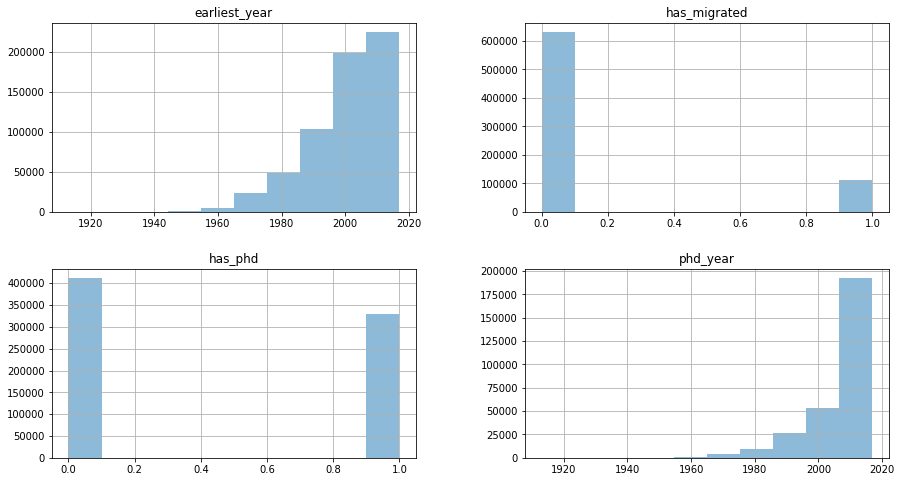

In [8]:
Df.hist(bins=10,figsize=(15,8), alpha=0.5)
plt.show()

# 2-  Data cleaning

I make the asumption that the mean of ph.d duration is four years. This could be other number

In [9]:
# I just look at the data where phd_year is not NaN. 
Df[Df['phd_year'].isnull()==False].head()

,orcid_id,phd_year,country_2016,earliest_year,earliest_country,has_phd,phd_country,has_migrated
1,0000-0001-5000-0736,2006.0,NaN,NaN,NaN,True,PT,False
2,0000-0001-5000-1018,2015.0,US,2005.0,US,True,US,False
4,0000-0001-5000-1923,2016.0,GB,2004.0,GB,True,GB,False
5,0000-0001-5000-223X,1998.0,GB,1989.0,GB,True,GB,True
7,0000-0001-5000-311X,2002.0,NaN,NaN,NaN,True,SE,False


I define two fuctions to clean phd_ year and earliest_year

In [10]:
def cleanyear(phdYear,earliest):
    if (phdYear==phdYear) & (earliest!=earliest):
        return phdYear-4
    else:
        return earliest

In [11]:
Df['earliest_year'] = [ cleanyear(x,y) for (x,y) in  zip(Df['phd_year'], Df['earliest_year']) ]

In [12]:
Df[Df['phd_year'].isnull()==False].head()

,orcid_id,phd_year,country_2016,earliest_year,earliest_country,has_phd,phd_country,has_migrated
1,0000-0001-5000-0736,2006.0,NaN,2002.0,NaN,True,PT,False
2,0000-0001-5000-1018,2015.0,US,2005.0,US,True,US,False
4,0000-0001-5000-1923,2016.0,GB,2004.0,GB,True,GB,False
5,0000-0001-5000-223X,1998.0,GB,1989.0,GB,True,GB,True
7,0000-0001-5000-311X,2002.0,NaN,1998.0,NaN,True,SE,False


In [13]:
def cleanyearv2(phdYear,earliest,hasPhd):
    if (phdYear!=phdYear) & (earliest==earliest) & (hasPhd==True) :
        return earliest+4
    else:
        return phdYear

In [14]:
Df['phd_year'] = [ cleanyearv2(x,y,z) for (x,y,z) in  zip(Df['phd_year'], Df['earliest_year'],Df['has_phd']) ]

In [15]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741867 entries, 0 to 741866
Data columns (total 8 columns):
orcid_id            741867 non-null object
phd_year            305776 non-null float64
country_2016        500348 non-null object
earliest_year       610927 non-null float64
earliest_country    603495 non-null object
has_phd             741867 non-null bool
phd_country         315717 non-null object
has_migrated        741867 non-null bool
dtypes: bool(2), float64(2), object(4)
memory usage: 35.4+ MB


In [16]:
# One can notice that after this cleaning operation, we get some phd_years greater than 2017.
Df[Df['phd_year']==2018].head(2)

,orcid_id,phd_year,country_2016,earliest_year,earliest_country,has_phd,phd_country,has_migrated
598,0000-0001-5015-9712,2018.0,MY,2014.0,MY,True,MY,False
1395,0000-0001-5038-7328,2018.0,PT,2014.0,PT,True,IT,True


As dataset is collected on 2017 and after cleaning some NaN in phd_year  I noticed that some of them are greater than 2017, I decided to just replace them by 2017.

In [17]:
def cleanyear2017(x):
    if x>2017:
        return 2017
    else:
        return x

In [18]:
Df['phd_year'] = [cleanyear2017(x) for x in Df['phd_year']]

In [19]:
Df[Df['phd_year'] > 2017]

,orcid_id,phd_year,country_2016,earliest_year,earliest_country,has_phd,phd_country,has_migrated


In [20]:
Df[Df['has_phd']==False]['phd_year'].count()

0

In [21]:
Df['phd_year'].max()

2017.0

In [22]:
# I look at the graduated cases
graduated = Df[Df['has_phd']==True]

In [23]:
graduated.head(10)

,orcid_id,phd_year,country_2016,earliest_year,earliest_country,has_phd,phd_country,has_migrated
1,0000-0001-5000-0736,2006.0,NaN,2002.0,NaN,True,PT,False
2,0000-0001-5000-1018,2015.0,US,2005.0,US,True,US,False
4,0000-0001-5000-1923,2016.0,GB,2004.0,GB,True,GB,False
5,0000-0001-5000-223X,1998.0,GB,1989.0,GB,True,GB,True
7,0000-0001-5000-311X,2002.0,NaN,1998.0,NaN,True,SE,False
8,0000-0001-5000-3822,2016.0,CA,1998.0,CA,True,CA,False
9,0000-0001-5000-4390,1986.0,NaN,1982.0,NaN,True,IN,False
14,0000-0001-5000-5959,2017.0,SE,2013.0,SE,True,NaN,False
15,0000-0001-5000-5991,2008.0,KR,2003.0,US,True,US,False
16,0000-0001-5000-6177,2011.0,GH,1999.0,GH,True,GH,False


 I notice that the phd_year of graduated Ph.Ds are all given here.
 
 It makes sens that for those who have not received their ph.d, their phd_year is NaN.
 
 One can notice also that for 741867 enrolled for ph.d (number of orcid_id in Df) 
 
just 329291 received their ph.d(which is 44.39 %)

In [24]:
# Phds researchers proportion with respect to enrolled for phd.
proportion = Df[Df["has_phd"]==True]["orcid_id"].count()/Df["orcid_id"].count()

In [25]:
print("Percentage of graduated phds: {:.4}".format(proportion*100)+" %")
graduated.info()

Percentage of graduated phds: 44.39 %
<class 'pandas.core.frame.DataFrame'>
Int64Index: 329291 entries, 1 to 741864
Data columns (total 8 columns):
orcid_id            329291 non-null object
phd_year            305776 non-null float64
country_2016        254544 non-null object
earliest_year       305776 non-null float64
earliest_country    298367 non-null object
has_phd             329291 non-null bool
phd_country         315717 non-null object
has_migrated        329291 non-null bool
dtypes: bool(2), float64(2), object(4)
memory usage: 18.2+ MB


<Figure size 432x288 with 0 Axes>

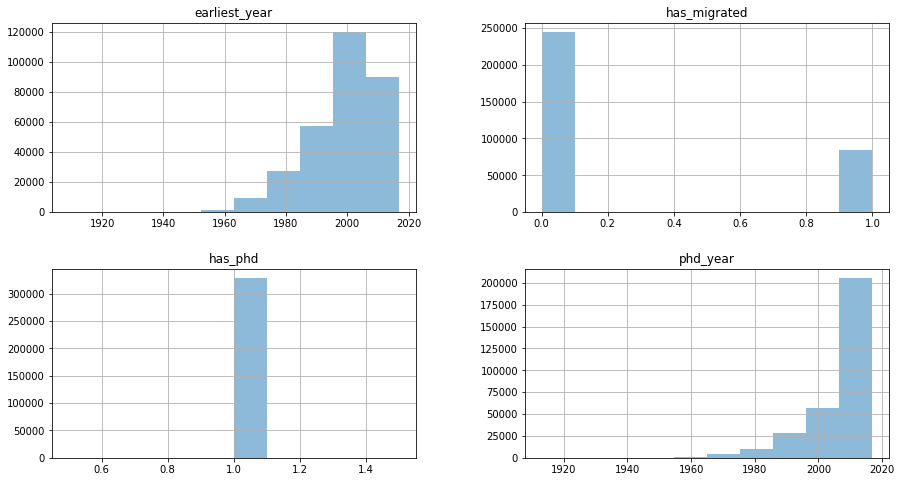

In [26]:
plt.figure();
graduated.hist(bins=10,figsize=(15,8), alpha=0.5 )
plt.show()

# 3- A pre-analysis of Scientist phds migration .

In [27]:
MigrationOrNot = graduated.groupby('has_migrated').count()

In [28]:
MigrationOrNot

,orcid_id,phd_year,country_2016,earliest_year,earliest_country,has_phd,phd_country
has_migrated,,,,,,,
False,244902,222687,180923,222687,215976,244902,233078
True,84389,83089,73621,83089,82391,84389,82639


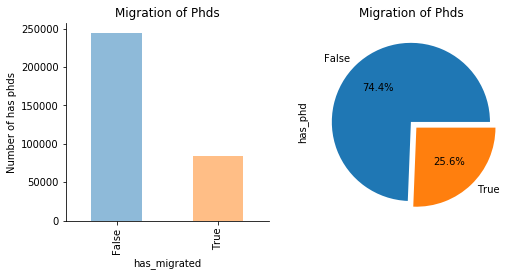

In [29]:
fig = plt.figure(figsize=(8,8))
explode = (0.,0.1)

ax = fig.add_subplot(2,2,1)
MigrationOrNot['has_phd'].plot(kind='bar', alpha=0.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel('Number of has phds')
plt.title('Migration of Phds')

ax = fig.add_subplot(2,2,2)
MigrationOrNot['has_phd'].plot(kind='pie', explode=explode, autopct='%1.1f%%')
plt.title('Migration of Phds')

plt.show()

In [30]:
PhdMigrated = graduated[graduated['has_migrated']== True]

In [31]:
PhdMigrated.head()

,orcid_id,phd_year,country_2016,earliest_year,earliest_country,has_phd,phd_country,has_migrated
5,0000-0001-5000-223X,1998.0,GB,1989.0,GB,True,GB,True
21,0000-0001-5000-8017,2002.0,KE,1993.0,KE,True,DK,True
36,0000-0001-5001-2171,1993.0,NaN,1985.0,GB,True,GB,True
38,0000-0001-5001-3027,2010.0,IE,2002.0,IT,True,IT,True
45,0000-0001-5001-5495,2016.0,AU,1987.0,AU,True,AU,True


In [32]:
PhdMig = PhdMigrated.groupby('phd_year').count()

I notice that, according to this data, the migration of PhDs started in 1952.

In [33]:
PhdMig.head()

,orcid_id,country_2016,earliest_year,earliest_country,has_phd,phd_country,has_migrated
phd_year,,,,,,,
1952.0,1,1,1,1,1,1,1
1953.0,1,1,1,1,1,1,1
1954.0,4,2,4,4,4,4,4
1956.0,5,2,5,5,5,5,5
1957.0,5,3,5,4,5,5,5


In [34]:
PhdMig.iloc[20:30]

,orcid_id,country_2016,earliest_year,earliest_country,has_phd,phd_country,has_migrated
phd_year,,,,,,,
1973.0,109,76,109,108,109,107,109
1974.0,145,103,145,141,145,145,145
1975.0,163,123,163,162,163,163,163
1976.0,177,140,177,175,177,174,177
1977.0,175,143,175,174,175,173,175
1978.0,223,186,223,220,223,221,223
1979.0,229,190,229,228,229,225,229
1980.0,266,223,266,265,266,261,266
1981.0,260,232,260,255,260,257,260


In [35]:
PhdMig.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 65 entries, 1952.0 to 2017.0
Data columns (total 7 columns):
orcid_id            65 non-null int64
country_2016        65 non-null int64
earliest_year       65 non-null int64
earliest_country    65 non-null int64
has_phd             65 non-null int64
phd_country         65 non-null int64
has_migrated        65 non-null int64
dtypes: int64(7)
memory usage: 4.1 KB


#                           - Global Scientist phds migration.

 I notice that the trend of the number of Researchers who migrated is increasing with a deep in 2015. I don't understand the deep point, may be I need more information to explain it. The last part of the  curve could say that this migration will increase in the future! But the data here don't help me find the causes.

In [36]:
PhdMig.iloc[60:]

,orcid_id,country_2016,earliest_year,earliest_country,has_phd,phd_country,has_migrated
phd_year,,,,,,,
2013.0,5103,4466,5103,5064,5103,4988,5103
2014.0,4749,3895,4749,4702,4749,4682,4749
2015.0,3892,2889,3892,3850,3892,3843,3892
2016.0,11805,11796,11805,11778,11805,11788,11805
2017.0,501,395,501,500,501,455,501


In [37]:
# In this construction I drop the year 2017, because the data was collected partially and this fact could biase the analysis
X = list(PhdMig.index.values)[:64]

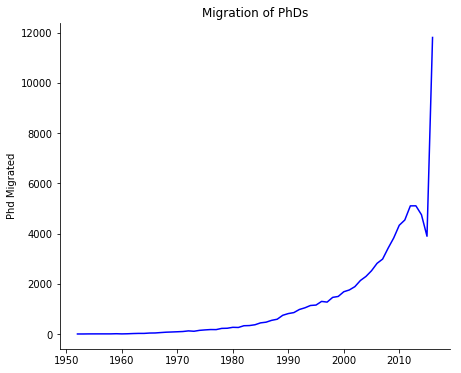

In [38]:
x_values = X
y_values = PhdMig['has_migrated'].iloc[:64]

fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(1,1,1)
ax.plot(x_values, y_values, c='blue')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel('Phd Migrated')
ax.set_title('Migration of PhDs')

plt.show()

In [39]:
GraduatedYear = graduated.groupby('phd_year').count()

In [40]:
GraduatedYear.head(5)

,orcid_id,country_2016,earliest_year,earliest_country,has_phd,phd_country,has_migrated
phd_year,,,,,,,
1913.0,1,0,1,0,1,1,1
1941.0,1,0,1,0,1,1,1
1947.0,1,0,1,1,1,1,1
1949.0,1,1,1,1,1,1,1
1950.0,2,2,2,2,2,0,2


In [41]:
GraduatedYearHasMigrated = GraduatedYear[GraduatedYear['has_migrated']==True]

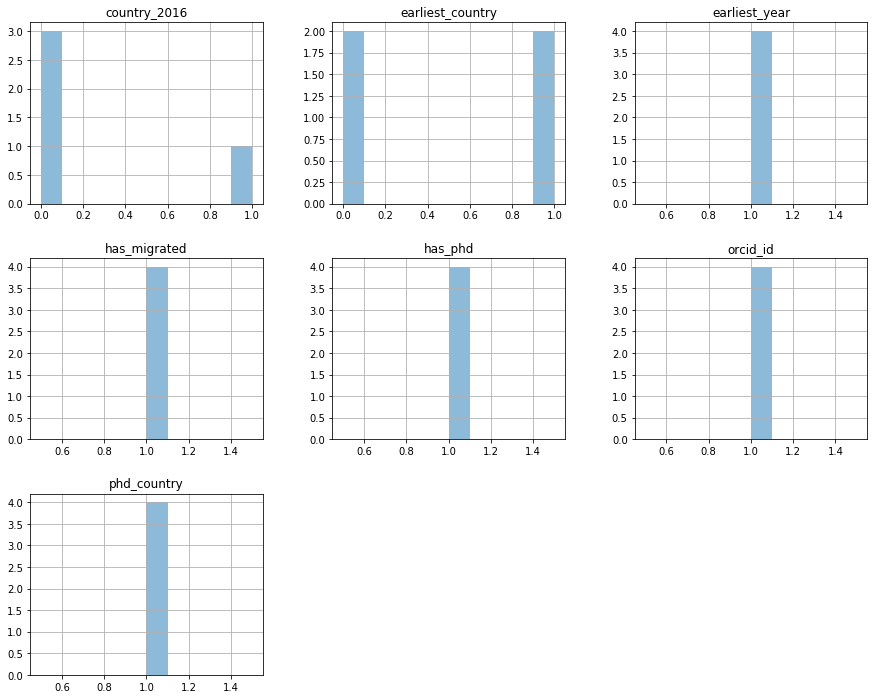

In [42]:
GraduatedYearHasMigrated.hist(bins=10, figsize=(15,12), alpha=0.5 )
plt.show()

# - Europe
# . From  Italy, France and United Kingdom

In [43]:
Df_it = Df[Df['phd_country']=='IT']
Df_france = Df[Df['phd_country']=='FR']
Df_gb = Df[Df['phd_country']=='GB']

In [44]:
Df1 = Df_it.groupby('has_migrated').count()
Df2 = Df_france.groupby('has_migrated').count()
Df3 = Df_gb.groupby('has_migrated').count()

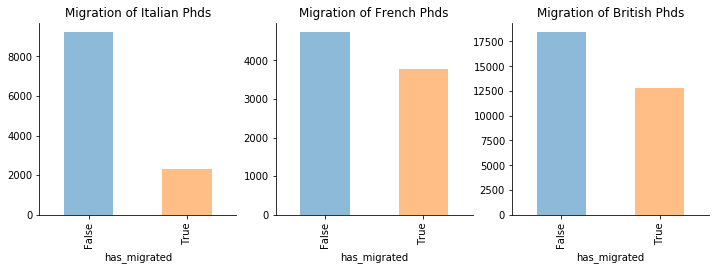

In [45]:
fig = plt.figure(figsize=(12,12))
#explode = (0.,0.1)
ax = fig.add_subplot(3,3,1)
Df1['orcid_id'].plot( kind='bar', alpha=0.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title('Migration of Italian Phds')

ax = fig.add_subplot(3,3,2)
Df2['orcid_id'].plot( kind='bar', alpha=0.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title('Migration of French Phds')

ax = fig.add_subplot(3,3,3)
Df3['orcid_id'].plot( kind='bar', alpha=0.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title('Migration of British Phds')
plt.show()

In [46]:
Phd_it_migrated = Df_it[Df_it['has_migrated']==True ]
Phd_france_migrated = Df_france[Df_france['has_migrated']==True ]
Phd_gb_migrated = Df_gb[Df_gb['has_migrated']==True ]

In [47]:
Phd_it_mig = Phd_it_migrated.groupby('phd_year').count()
Phd_france_mig = Phd_france_migrated.groupby('phd_year').count()
Phd_gb_mig = Phd_gb_migrated.groupby('phd_year').count()

In [48]:
X1 = list(Phd_it_mig.index.values)[:-1]
X2 = list(Phd_france_mig.index.values)[:-1]
X3 = list(Phd_gb_mig.index.values)[:-1]

In [49]:
y_1 = Phd_it_mig['has_migrated'].iloc[:-1]
y_2 = Phd_france_mig['has_migrated'].iloc[:-1]
y_3 = Phd_gb_mig['has_migrated'].iloc[:-1]

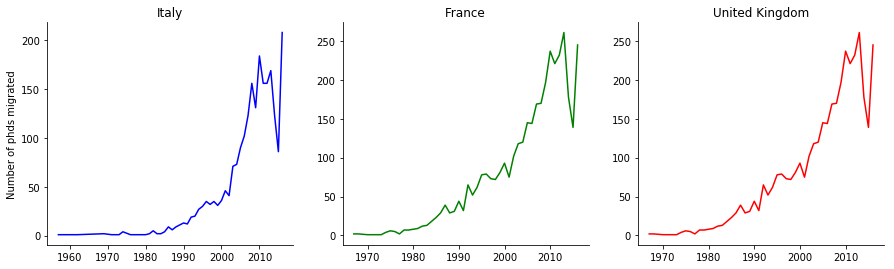

In [50]:
fig = plt.figure(figsize=(15,9))
ax = fig.add_subplot(2,3,1)
ax.plot(X1, y_1, c='blue')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel('Number of phds migrated')

ax.set_title('Italy')
#ax.tick_params(bottom='off', top='off', left='off', right='off')

ax = fig.add_subplot(2,3,2)
ax.plot(X2, y_2, c='green')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_title('France')
#ax.tick_params(bottom='off', top='off', left='off', right='off')

ax = fig.add_subplot(2,3,3)
ax.plot(X2, y_2, c='red')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_title('United Kingdom')
#ax.tick_params(bottom='off', top='off', left='off', right='off')



plt.show()


# - Nord America
# . From USA and Canada

In [51]:
Df_usa = Df[Df['phd_country']=='US']
Df_canada = Df[Df['phd_country']=='CA']

In [52]:
Df1 = Df_usa.groupby('has_migrated').count()
Df2 = Df_canada.groupby('has_migrated').count()

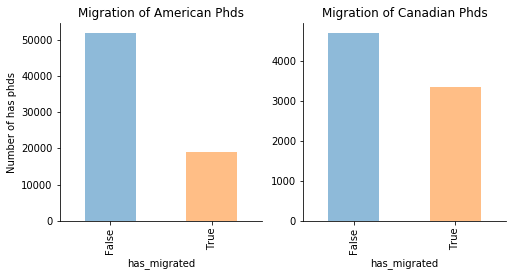

In [53]:
fig = plt.figure(figsize=(8,8))
explode = (0.,0.1)
ax = fig.add_subplot(2,2,1)
Df1['orcid_id'].plot( kind='bar', alpha=0.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel('Number of has phds')
plt.title('Migration of American Phds')

ax = fig.add_subplot(2,2,2)
Df2['orcid_id'].plot( kind='bar', alpha=0.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title('Migration of Canadian Phds')
plt.show()

In [54]:
Phd_usa_migrated = Df_usa[Df_usa['has_migrated']==True ]
Phd_canada_migrated = Df_canada[Df_canada['has_migrated']==True ]

In [55]:
Phd_usa_mig = Phd_usa_migrated.groupby('phd_year').count()
Phd_canada_mig = Phd_canada_migrated.groupby('phd_year').count()

In [56]:
X1 = list(Phd_usa_mig.index.values)[:-1]
X2 = list(Phd_canada_mig.index.values)[:-1]

In [57]:
y_1 = Phd_usa_mig['has_migrated'].iloc[:-1]
y_2 = Phd_canada_mig['has_migrated'].iloc[:-1]

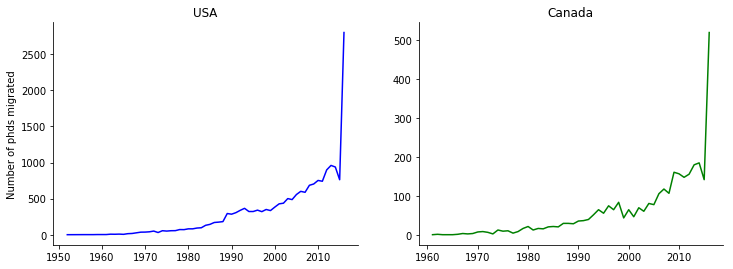

In [58]:
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(2,2,1)
ax.plot(X1, y_1, c='blue')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel('Number of phds migrated')

ax.set_title('USA')
#ax.tick_params(bottom='off', top='off', left='off', right='off')

ax = fig.add_subplot(2,2,2)
ax.plot(X2, y_2, c='green')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_title('Canada')
#ax.tick_params(bottom='off', top='off', left='off', right='off')

plt.show()

# - Asia
# . From China and India 

In [59]:
#China and India
Df_china = Df[Df['phd_country']=='CN']
Df_india = Df[Df['phd_country']=='IN']

In [60]:
Df1 = Df_china.groupby('has_migrated').count()
Df2 = Df_india.groupby('has_migrated').count()

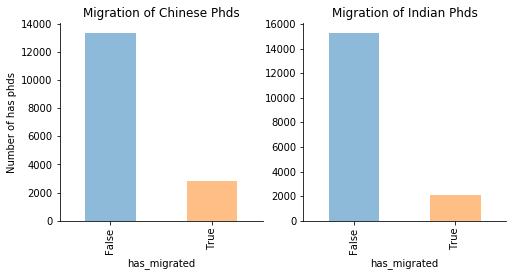

In [61]:
fig = plt.figure(figsize=(8,8))
explode = (0.,0.1)
ax = fig.add_subplot(2,2,1)
Df1['orcid_id'].plot( kind='bar', alpha=0.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel('Number of has phds')
plt.title('Migration of Chinese Phds')

ax = fig.add_subplot(2,2,2)
Df2['orcid_id'].plot( kind='bar', alpha=0.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.spines['left'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
plt.title('Migration of Indian Phds')
plt.show()

In [62]:
Phd_china_migrated = Df_china[Df_china['has_migrated']==True ]
Phd_india_migrated = Df_india[Df_india['has_migrated']==True ]

In [63]:
Phd_china_mig = Phd_china_migrated.groupby('phd_year').count()
Phd_india_mig = Phd_india_migrated.groupby('phd_year').count()

In [64]:
X1 = list(Phd_china_mig.index.values)[:-1]
X2 = list(Phd_india_mig.index.values)[:-1]

In [65]:
y_1 = Phd_china_mig['has_migrated'].iloc[:-1]
y_2 = Phd_india_mig['has_migrated'].iloc[:-1]

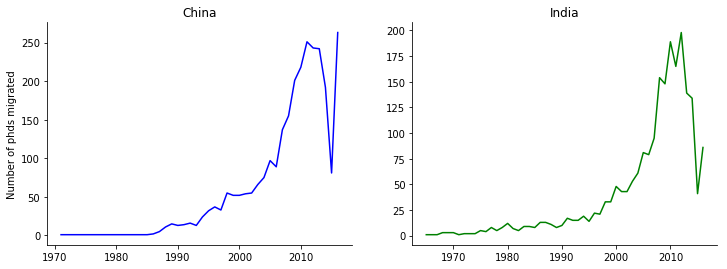

In [66]:
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(2,2,1)
ax.plot(X1, y_1, c='blue')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel('Number of phds migrated')

ax.set_title('China')


ax = fig.add_subplot(2,2,2)
ax.plot(X2, y_2, c='green')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_title('India')


plt.show()


# - Autralia and Brazil

In [67]:
Df_australia = Df[Df['phd_country']=='AU']
Df_brazil = Df[Df['phd_country']=='BR']

In [68]:
Df1 = Df_australia.groupby('has_migrated').count()
Df2 = Df_brazil.groupby('has_migrated').count()

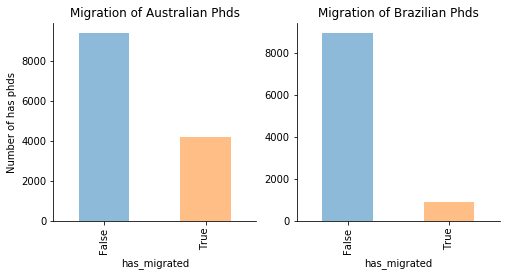

In [69]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(2,2,1)
Df1['orcid_id'].plot( kind='bar', alpha=0.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel('Number of has phds')
plt.title('Migration of Australian Phds')

ax = fig.add_subplot(2,2,2)
Df2['orcid_id'].plot( kind='bar', alpha=0.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title('Migration of Brazilian Phds')

plt.show()

In [70]:
Phd_australia_migrated = Df_australia[Df_australia['has_migrated']==True ]
Phd_brazil_migrated = Df_brazil[Df_brazil['has_migrated']==True ]

In [71]:
Phd_australia_mig = Phd_australia_migrated.groupby('phd_year').count()
Phd_brazil_mig = Phd_brazil_migrated.groupby('phd_year').count()

In [72]:
X1 = list(Phd_australia_mig.index.values)[:-1]
X2 = list(Phd_brazil_mig.index.values)[:-1]

In [73]:
y_1 = Phd_australia_mig['has_migrated'].iloc[:-1]
y_2 = Phd_brazil_mig['has_migrated'].iloc[:-1]

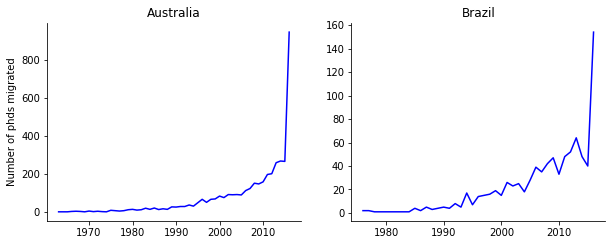

In [74]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(2,2,1)
ax.plot(X1, y_1, c='blue')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel('Number of phds migrated')

ax.set_title('Australia')

ax = fig.add_subplot(2,2,2)
ax.plot(X2, y_2, c='blue')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


ax.set_title('Brazil')

plt.show()

# 4-  Phds countries

In [75]:
test = Df.groupby('phd_country').count()['orcid_id'].sort_values(ascending=False)
listCountry = test[:15].index
DfTest = Df.copy()

In [76]:
def otherCountry(x):
    if x in listCountry:
        return x
    elif x!= x:
        return 'Unknown'
    else:
        return 'Other'

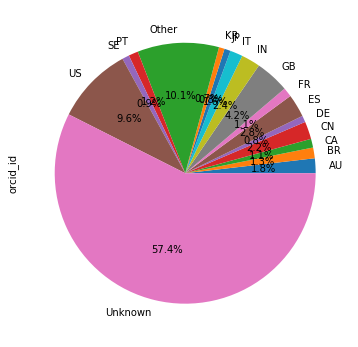

In [77]:
DfTest['phd_country'] = [otherCountry(x) for x in Df['phd_country']]
DfTest.groupby('phd_country').count()['orcid_id'].plot(figsize=(6,6), kind='pie', autopct='%1.1f%%')
plt.show()

 I notice that the  unknown phd  countries is 57.4% which is too much. But below I make some visualization for known  phds countries 

In [78]:
DfKnownCountries = DfTest[DfTest['phd_country']!='Unknown'].groupby('phd_country').count()

In [79]:
DfKnownCountries.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, AU to US
Data columns (total 7 columns):
orcid_id            16 non-null int64
phd_year            16 non-null int64
country_2016        16 non-null int64
earliest_year       16 non-null int64
earliest_country    16 non-null int64
has_phd             16 non-null int64
has_migrated        16 non-null int64
dtypes: int64(7)
memory usage: 1.0+ KB


In [80]:
DfKnownCountries

,orcid_id,phd_year,country_2016,earliest_year,earliest_country,has_phd,has_migrated
phd_country,,,,,,,
AU,13584,12759,10724,12759,12233,13584,13584
BR,9862,9429,8180,9429,9381,9862,9862
CA,8033,7591,6148,7591,7368,8033,8033
CN,16221,14780,12403,14780,14734,16221,16221
DE,5985,5748,4831,5748,5658,5985,5985
ES,21099,19273,15675,19273,18394,21099,21099
FR,8515,8132,6754,8132,7960,8515,8515
GB,31294,30150,24459,30150,29522,31294,31294
IN,17444,16008,13616,16008,15866,17444,17444


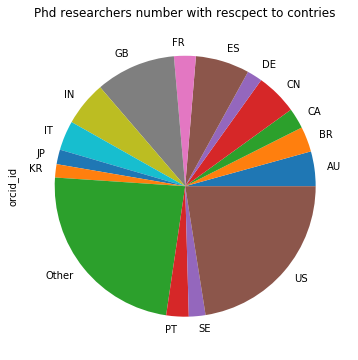

In [81]:
DfKnownCountries['orcid_id'].plot(figsize=(6,6), kind='pie')
plt.title('Phd researchers number with rescpect to contries')
plt.show()

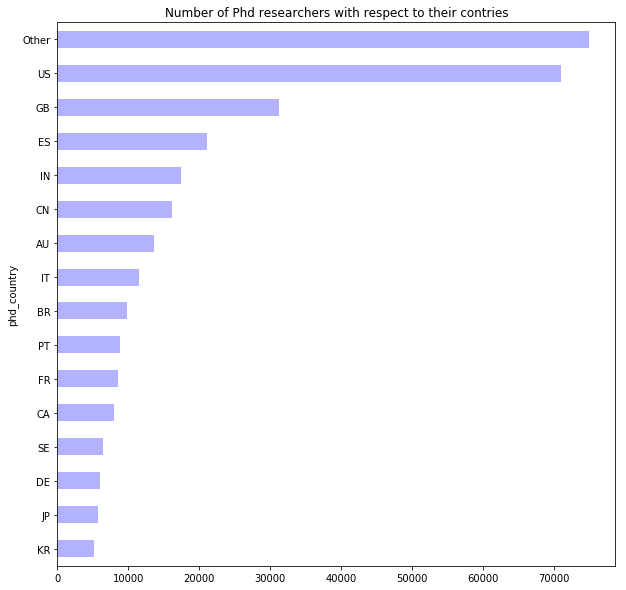

In [82]:
Df_countries = DfKnownCountries['orcid_id'].sort_values(ascending=True)
Df_countries.plot(figsize=(10,10), kind='barh', color='blue', alpha = 0.3 )
plt.title('Number of Phd researchers with respect to their contries')

plt.show()

## Here is the mapping of number of Phd Scientific Researchers with respect to countries

In [83]:
# I use the county codes to contruct the liste of country names
countries = ['Korea, Republic of', 'Japan', 'Germany', 'Sweden', 'Canada', 'France', 'Portugal', 'Brazil', 'Italy', 'Australia', 'China', 'India', 'Espain', 'United Kingdom', 'United States']

In [84]:
Nb_phds = list(Df_countries.iloc[:-1])

In [85]:
data = [ dict(
        type = 'choropleth',
        locations = countries,
        z = Nb_phds,
        locationmode = 'country names',
        text = countries,
        marker = dict(
            line = dict(color = 'rgb(0,0,0)', width = 1)),
            colorbar = dict(autotick = True, tickprefix = '', 
            title = '# Number of Phds')
            )
       ]

layout = dict(
    title = ' Number of Phds in countries',
    geo = dict(
        showframe = False,
        showocean = True,
        oceancolor = 'rgb(41, 135, 202)',
        projection = dict(
        type = 'orthographic',
            rotation = dict(
                    lon = 60,
                    lat = 10),
        ),
        lonaxis =  dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
            ),
        lataxis = dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
                )
            ),
        )

fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap')

# Conclusion:


 The trend of the number of Scientist phds researcher in migration is increasing with a deep in 2015. I don't understand the cause of this deep point. I notice that USA is the country with the most phds graduates.